In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
path='./insurance.csv'
insurance_df=pd.read_csv(path)
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
## Mengetahui ukuran dimensi dari dataset
insurance_df.shape

(1338, 7)

In [4]:
#checking missing value
insurance_df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [5]:

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#statistics summary
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## EDA 

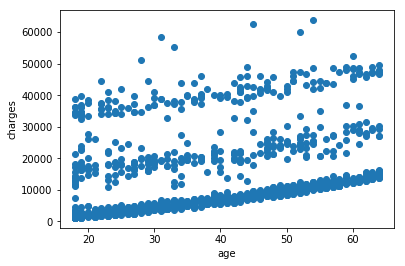

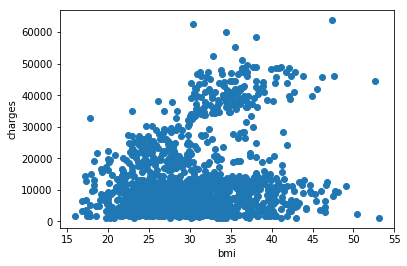

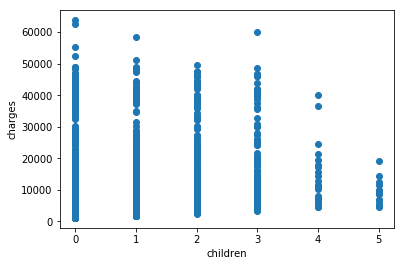

In [7]:
for i, j in zip(insurance_df.describe().columns, range(0, 3)):
    fig=plt.figure()
    plt.scatter(insurance_df[i], insurance_df['charges'])
    plt.xlabel(i)
    plt.ylabel('charges')

plt.show()

In [8]:
sns.heatmap?

In [9]:
col=insurance_df.describe().columns
data=insurance_df[col]
corr=data.corr()

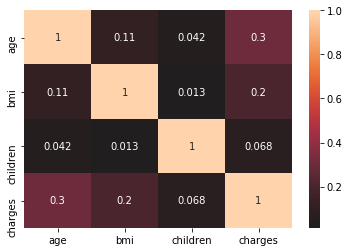

In [10]:
# Making correlation heatmap
sns.heatmap(corr, vmax=1, center=0, annot=True)

/home/edi/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/edi/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


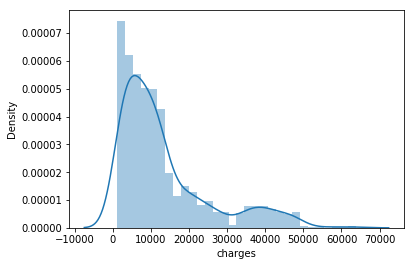

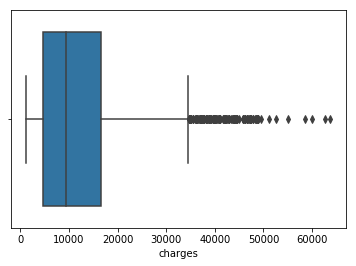

In [11]:
# Plotting distribution of charges
fig1= plt.figure()
sns.distplot(data['charges'])
fig2= plt.figure()
sns.boxplot(data['charges'])

In [12]:
#checking skewness and curtosis
print('Skewness: {}'.format(data['charges'].skew()))
print('Kurtosis: {}'.format(data['charges'].kurt()))

Skewness: 1.5158796580240388
Kurtosis: 1.6062986532967907


/home/edi/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/edi/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


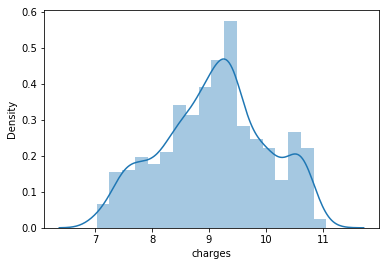

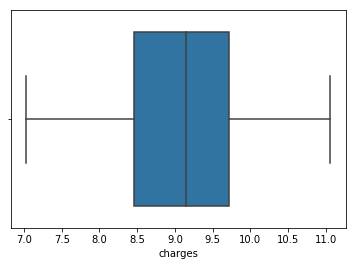

In [13]:
y_norm=np.log1p(data['charges'])
fig1= plt.figure()
sns.distplot(y_norm)
fig2= plt.figure()
sns.boxplot(y_norm)

In [14]:
print('Skewness: {}'.format(y_norm.skew()))
print('Kurtosis: {}'.format(y_norm.kurt()))

Skewness: -0.08981728740026819
Kurtosis: -0.6368551788331378


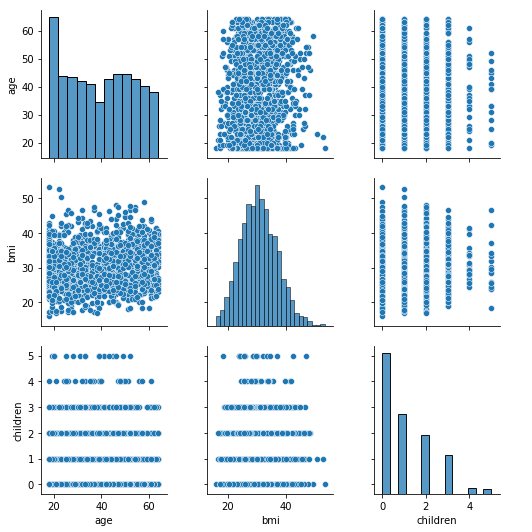

In [15]:
sns.pairplot(data.drop(columns=['charges']))
plt.tight_layout()

In [16]:
# Data preparation prediction variable
X=data.drop(columns=['charges'])
y=data['charges'].values.reshape(-1, 1)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
Xscaler=MinMaxScaler()
yscaler=MinMaxScaler()

X_norm1=Xscaler.fit_transform(X)
y_norm1=yscaler.fit_transform(y)

In [60]:
## splitting data into training and test set
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test= train_test_split(X_norm1, y_norm1, test_size=0.2, random_state=1)

In [62]:
#making linear regression model
from sklearn.linear_model import LinearRegression

In [63]:
## define model and train it
model_lr=LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [78]:
# Predict 
y_pred=model_lr.predict(X_test)
yscaler.inverse_transform(y_pred[0:5])

array([[ 9483.7181142 ],
       [17647.65890924],
       [17811.94309955],
       [17971.66710865],
       [ 6250.37543097]])

In [65]:
## evaluate model perfomance
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.14245474849324463